# Исследование гипотез

## Цель исследования:

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Ход исследования: 

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Задача:

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


### Часть 2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задача:

##### Проанализировать A/B-тест:

* Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
* Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
* Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
* Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
* Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Обзор Данных

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import math

In [2]:
# чтение файлов с данными и сохранение в df
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
print(hypothesis.info())
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Структура Hypothesis:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
# чтение файлов с данными и сохранение в df
orders = pd.read_csv('/datasets/orders.csv')
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Структура orders:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [4]:
# чтение файлов с данными и сохранение в df
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.info())
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Сруктура visitors: 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Вывод 

Открыли файлы с данными:
/datasets/hypothesis.csv
/datasets/orders.csv
/datasets/visitors.csv

С помощью метода info() узнали данные о таблице. На первый взгляд пропусков нет,но с толбцы с датами имеют некорректный вид.
Так же проверим данные на наличие дубликатов и приведем наименование столбцов к единому стилю

# Предобработка данных

In [5]:
#приведем наименование столбцов к единому стилю

hypothesis.columns = hypothesis.columns.str.lower()

orders.columns = [x.replace('Id', '_id') for x in orders.columns]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
O = orders.groupby('transaction_id')['group'].nunique().reset_index()
O = O[O['group'] > 1]
O

,transaction_id,group


In [7]:
# Проверим точно нет ли пропусков в данных
print(hypothesis.isnull().sum())
print()
print(orders.isnull().sum())
print()
print(visitors.isnull().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64


In [8]:
# проверим данные таблиц на дубликаты
print(hypothesis.duplicated().sum())
print()
print(orders.duplicated().sum())
print()
print(visitors.duplicated().sum())

0

0

0


In [9]:
# изменим тип данных для столбцов с датами
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

print(visitors.info())
print()
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


# Вывод 

Провели предобработку данных,удостоверились в том, что пропуски отсутсвуют,привели дату к правильному формату, проверили данные на наличие дубликатов,таковых не выяили. Привели названия столбцов к правильному стилю

# Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

pd.set_option('max_colwidth', 200)

round(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False),2)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


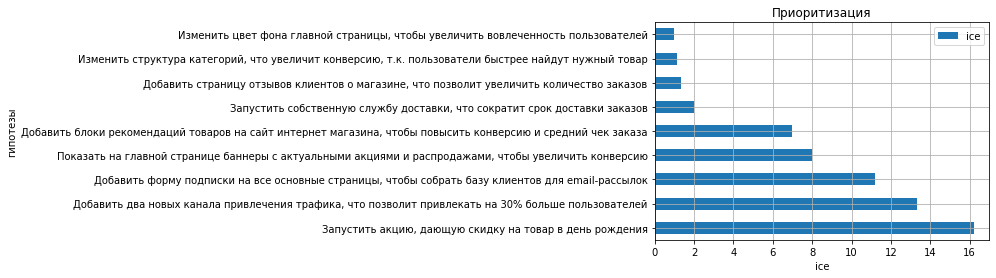

In [11]:
hypothesis[['hypothesis', 'ice']].set_index('hypothesis').sort_values(by='ice', ascending=False).plot(kind='barh',grid='True')
plt.title('Приоритизация')
plt.xlabel('ice')
plt.ylabel('гипотезы')
plt.show()


Глядя на гистограмму можем заметить какие гипотезы являются более перспективными. По методу ICE самой перспективной считается "Запустить акцию,дающую скидку на товар в день рождения"

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
В отличии от ICE здесь добавляется 4 компонент Reach (скольких пользователей затронет изменение, которое мы хотим внести)

In [12]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


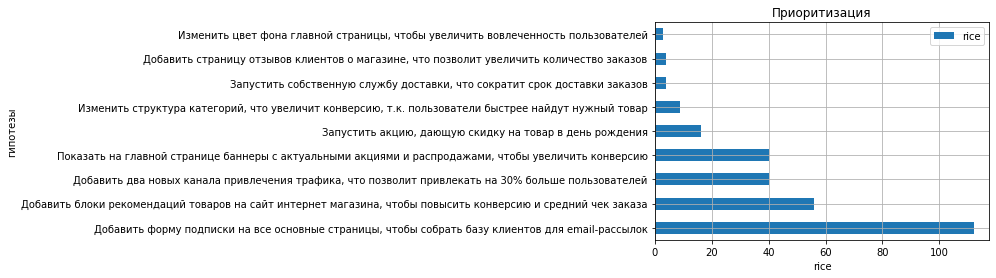

In [13]:
hypothesis[['hypothesis', 'rice']].set_index('hypothesis').sort_values(by='rice', ascending=False).plot(kind='barh',grid='True')
plt.title('Приоритизация')
plt.xlabel('rice')
plt.ylabel('гипотезы')
plt.show()

Глядя на гистограмму можем заметить какие гипотезы являются более перспективными. По методу ICE самой перспективной считалась "Запустить акцию,дающую скидку на товар в день рождения",но если учитывать скольких пользователей это затронет с помощью метода RICE, в лидерах другая гипотеза,но стоит заметить что ТОП 5 гипотез остались теми же, но поменялись местами друг с другом

# Анализ A/B-теста

###### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                    ]
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transaction_id' : 'nunique', 
         'visitor_id' : 'nunique', 
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                      ]
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Убедимся корректно ли был создан датафрейм cumulativeData, проверим совпадает ли минимальная и максимальная даты с исходными данными:

In [15]:
print('Минимальная дата заказа:',orders['date'].min())
print()
print('Максимальная дата заказа:',orders['date'].max())

Минимальная дата заказа: 2019-08-01 00:00:00

Максимальная дата заказа: 2019-08-31 00:00:00


In [16]:
print('Минимальная дата заказа:',cumulativeData['date'].min())
print()
print('Максимальная дата заказа:',cumulativeData['date'].max())

Минимальная дата заказа: 2019-08-01 00:00:00

Максимальная дата заказа: 2019-08-31 00:00:00


###### Даты совпадают - датафрейм создан корректно

Построим графики кумулятивной выручки по группам :

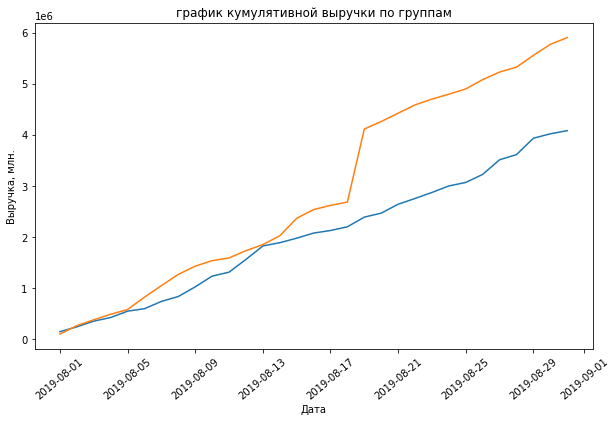

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Зададим размер графику
plt.figure(figsize=(10,6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('график кумулятивной выручки по группам')
plt.ylabel("Выручка, млн.")
plt.xlabel("Дата")
plt.xticks(rotation = 40)
plt.show()

###### Вывод
Можем заметить, что выручка равномерно увеличивается в обеих группах до 18 августа,потом у группы В идет резкий скачёк, что может свидетельствовать о выбросах в виде всплеска числа заказов, либо о появлении очень дорогих заказов в выборке. В дальнейшем мы это проверим 

###### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

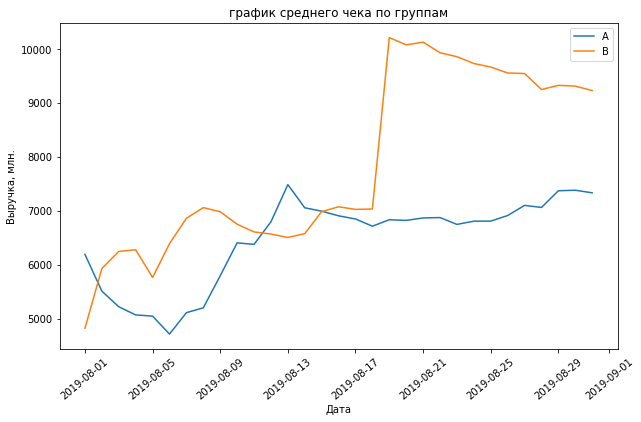

In [18]:
# Зададим размер графику
plt.figure(figsize=(10,6))


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график среднего чека по группам')
plt.ylabel("Выручка, млн.")
plt.xlabel("Дата")
plt.legend()
plt.xticks(rotation = 40)
plt.show()

###### Вывод 
На графике можем заметить резкий скачек среднего чека у группы В, что скорее всего дает нам понять,что была совершена крупная покупка

###### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline()

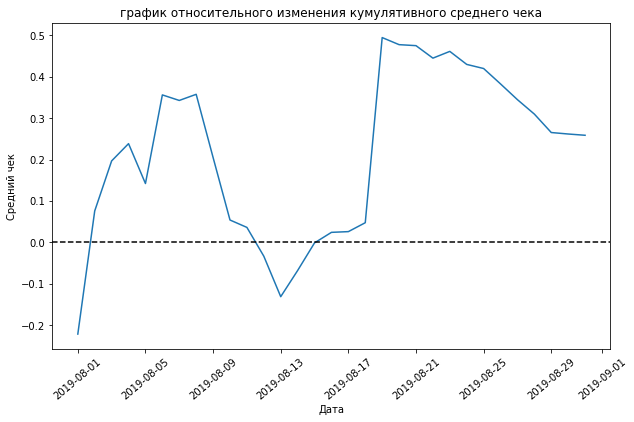

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер графику
plt.figure(figsize=(10,6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('график относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation = 40)
plt.show()

###### Вывод 
На графике можно заметить резкие скачки, что дает нам понять что имеют место быть крупные заказы

###### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

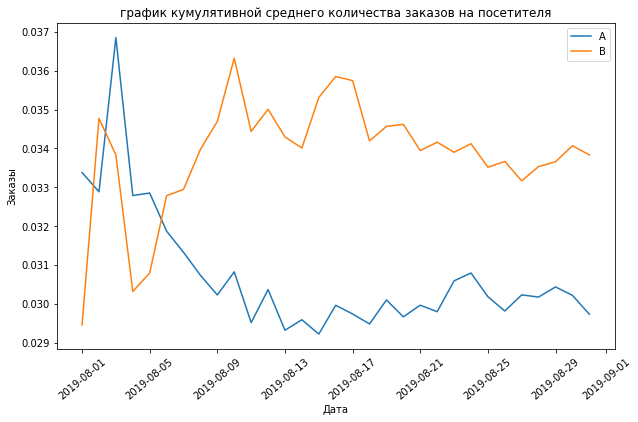

In [20]:
# считаем кумулятивную среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Зададим размер графику
plt.figure(figsize=(10,6))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('график кумулятивной среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.legend()
plt.xticks(rotation = 40)
plt.show()


###### Вывод
На графике видны колебания обоих груп примерно до 9 августа,далее они начинают стабилизироваться и глядя на график группа В выглядит предпочтительнее

###### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

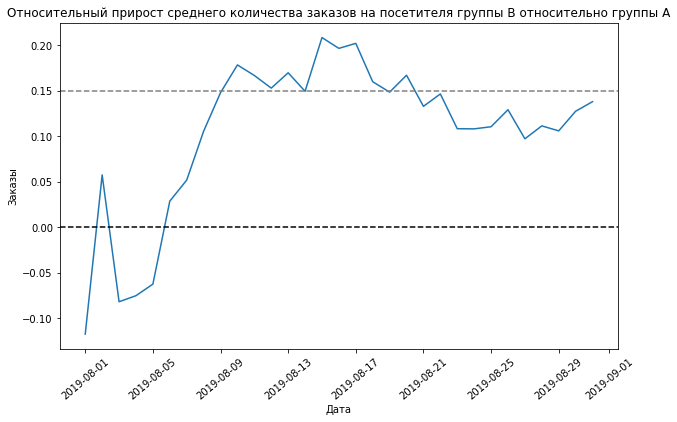

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер графику
plt.figure(figsize=(10,6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительный прирост среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.xticks(rotation = 40)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

###### Вывод
Глядя на график можем увидеть, что по началу группа В проигрывала группе А, затем вырвалась вперед, затем снова незначительно спустилась,а теперь снова показывает рост. Нам предстоит проанализировать аномалии и посмотерть что они нам дадут

###### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
Пользователи, совершившие много заказов, влияют на числитель формулы среднего количества заказов на посетителя. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок. 
Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [22]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Глядя на таблицу видно,что есть пользователи, которые совершали больше 5 и даже 11 заказов,что значительно больше обычных пользователей за неделю

###### Построим гистрограмму распределения количества заказов на одного пользователя:

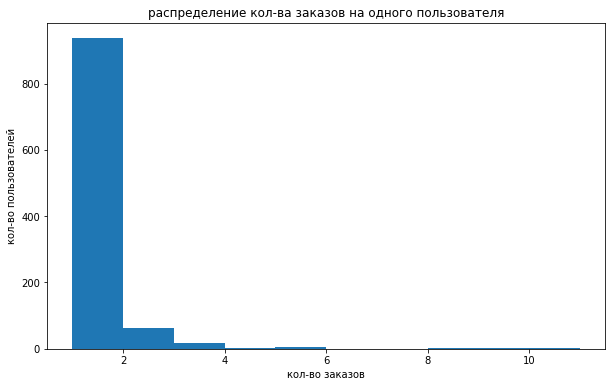

In [23]:
# Зададим размер графику
plt.figure(figsize=(10,6))

plt.hist(ordersByUsers['orders']) 
plt.title('распределение кол-ва заказов на одного пользователя')
plt.xlabel('кол-во заказов')
plt.ylabel('кол-во пользователей')
plt.show()

Большинство пользователей заказывали один раз,но кол-во людей которые заказали 2 и 3 раза так же значительна.

###### Построим точечную диаграмму числа заказов на одного пользователя:


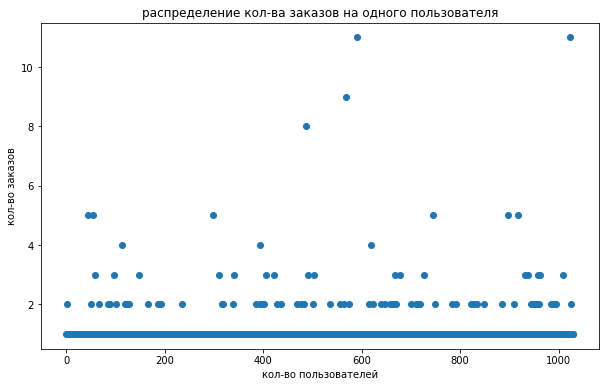

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers)))

# Зададим размер графику
plt.figure(figsize=(10,6))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('распределение кол-ва заказов на одного пользователя')
plt.ylabel('кол-во заказов')
plt.xlabel('кол-во пользователей')
plt.show()

По диаграмме видно что большинство пользователей соверщает 1 заказ,но так же видно что 2-3 заказа делают так же большое кол-во людей, их точная доля не ясна,пока не известно стоит считать их выбросами или нет

###### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% заказывали больше 4-х заказов. Возьмем 4 за верхнюю границу числа заказов

###### Построим точечный график стоимостей заказов. Сделаем выводы и предположения. 

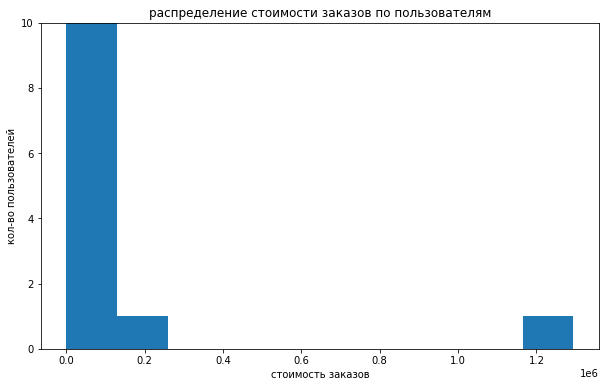

In [26]:
# Зададим размер графику
plt.figure(figsize=(10,6))
plt.ylim(0, 10)
plt.hist(orders['revenue'])
plt.title('распределение cтоимости заказов по пользователям')
plt.xlabel('стоимость заказов')
plt.ylabel('кол-во пользователей')
plt.show()

Глядя на гистограмму можем заметить выбросы 

###### Построим точечную диаграмму стоимостей заказов пользователей:

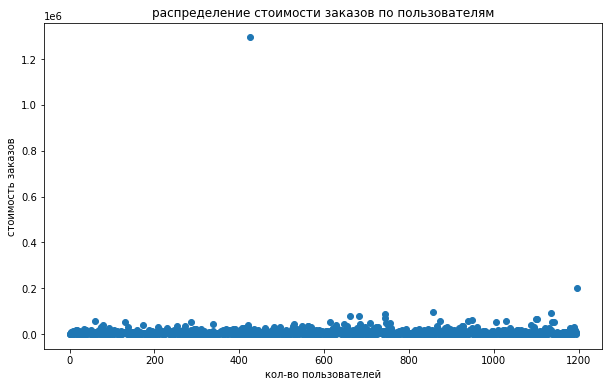

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# Зададим размер графику
plt.figure(figsize=(10,6))

plt.scatter(x_values, orders['revenue']) 
plt.title('распределение cтоимости заказов по пользователям')
plt.ylabel('стоимость заказов')
plt.xlabel('кол-во пользователей')
plt.show()

На диаграмме можем заметить огромный выброс. Стоимость заказа более 1 млн.! Так же есть и другие выбросы которые стоят меньше

###### построим диаграмму без явных выбросов, что бы посмотреть основную часть заказов

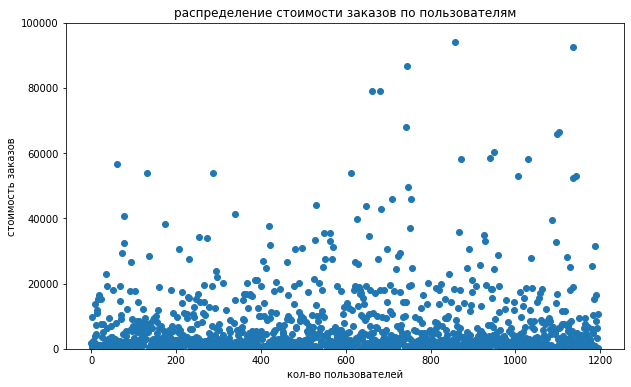

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# Зададим размер графику
plt.figure(figsize=(10,6))
plt.ylim(0, 100000)

plt.scatter(x_values, orders['revenue']) 
plt.title('распределение cтоимости заказов по пользователям')
plt.ylabel('стоимость заказов')
plt.xlabel('кол-во пользователей')
plt.show()

Можем заметить, что основная часть пользователей тратит до 20000

###### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Возьмем 58233 за верхнюю границу стоимости заказа

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы. 
* Нулевая: Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет

* Альтернативная: Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть

Уровень значимости p-value = 0.05

Начнём с подготовки данных.

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


названия столбцов данных:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [32]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [33]:

    alpha = 0.05 # уровень значимости 
    p_value = stats.mannwhitneyu(sampleA, sampleB)[1] # критерий Манна-Уитни
    print("P-value: {0:.3f}".format(p_value)) # форматируем p_value до 3-х знаков после запятой
    print("Относительный прирост В к А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
        
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разные")
        
        

P-value: 0.017
Относительный прирост В к А: 0.138
Отвергаем нулевую гипотезу: между группами есть разница


Первое число — p-value = 0.017 меньше 0.05. 

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.  

Относительный выигрышь группы B равен 13.8% — второе число в выводе.

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

Сформулируем гипотезы:

* Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по "сырым" данным нет. 
* Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами по "сырым" данным есть. 

Уровень значимости p-value = 0.05


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами:

In [34]:

    alpha = 0.05 # уровень значимости 
    p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] # критерий Манна-Уитни
    print("p_value: {0:.3f}".format(p_value)) # форматируем p_value до 3-х знаков после запятой
    print('Относительный прирост В к А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
        
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разны")

p_value: 0.729
Относительный прирост В к А: 0.259
Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разны


P-value значительно больше 0.05. 

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Впрочем, средний чек группы B значительно выше среднего чека группы A что скорее всего вызвано выбросами.

###### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем гипотезы: 

* Нулевая: Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет

* Альтернативная: Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть

Уровень значимости p-value = 0.05

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.
Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'],99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'],99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15


Всего 15 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



In [37]:

    alpha = 0.05 # уровень значимости 
    p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] # критерий Манна-Уитни
    print("p_value: {0:.3f}".format(p_value)) # форматируем p_value до 3-х знаков после запятой
    print("Относительный прирост В к А: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
        
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разные")
        
        

p_value: 0.014
Относительный прирост В к А: 0.153
Отвергаем нулевую гипотезу: между группами есть разница


Относительный выигрышь группы B увеличился до 15.3%, p-value уменьшился до 0.14. Мы заметили как аномалии влияют на результат,среднее количество заказов на посетителя группы В относительно группы А возросла

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

* Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по "очищенным" данным нет. 
* Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами по "очищенным" данным есть. 

Уровень значимости p-value = 0.05

In [38]:

    alpha = 0.05 # уровень значимости 
    p_value = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] # критерий Манна-Уитни
     
    print("p_value: {0:.3f}".format(p_value)) # форматируем p_value до 3-х знаков после запятой
    print(
    "Относительный прирост В к А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
        
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разны")

p_value: 0.851
Относительный прирост В к А: -0.006
Не получилось отвергнуть нулевую гипотезу, нет причин полагать что группы разны


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.


###### Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — очевидна.

# Общий вывод

В ходе исследования мы проделали следующие шаги:

* Открыли файлы с данными:
/datasets/hypothesis.csv;

/datasets/orders.csv;

/datasets/visitors.csv;

* С помощью метода info() узнали данные о таблице.
* Выполнили предобработку данных.

### 1 Часть

* Применили фреймворк ICE для приоритизации гипотез. Отсортировали их по убыванию приоритета.
* Применили фреймворк RICE для приоритизации гипотез. Отсортировали их по убыванию приоритета.
* Указали, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясили, почему так произошло.

В этой части стоит обратить внимание на следующие гипотезы в первую очередь:

* "Запустить акцию, дающую скидку на товар в день рождения";
* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
* "Показать на главной странице юаннеры с актуальными акциями и распродажами, чтобы увеличить среднее количество заказов на посетителя";
* "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить среднее количество заказов на посетителя и средний чек заказа";

Если мы берем в учет охват пользователей, то топ гипотез у нас не поменяется, но поменяется последовательность, поэтому приоритет немного сместится :

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
* "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить среднее количество заказов на посетителя и средний чек заказа";
* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* "Показать на главной странице юаннеры с актуальными акциями и распродажами, чтобы увеличить среднее количество заказов на посетителя";
* "Запустить акцию, дающую скидку на товар в день рождения";

### 2 Часть

Проанализировали A/B-тест:
* Построили график кумулятивной выручки по группам. Сделали выводы и предположения.
* Построили график кумулятивного среднего чека по группам. Сделали выводы и предположения.
* Построили график относительного изменения кумулятивного среднего чека группы B к группе A. Сделали выводы и предположения.
* Построили график кумулятивного среднего количества заказов на посетителя по группам. Сделали выводы и предположения.
* Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделали выводы и предположения.
* Построили точечный график количества заказов по пользователям. Сделали выводы и предположения.
* Посчитали 95-й и 99-й перцентили количества заказов на пользователя. Выбрали границу для определения аномальных пользователей.
* Построили точечный график стоимостей заказов. Сделали выводы и предположения.
* Посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов.
* Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделали выводы и предположения.
* Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделали выводы и предположения.
* Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделали выводы и предположения.
* Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделали выводы и предположения.
* Приняли решение по результатам теста.

В целом в ходе исследования выявили что между группами А и В есть статистически значимое различие в среднего количества заказов на посетителя как по "сырым" данным, так и по данным без "аномалий". Разница в среднего количества заказов на посетителя около 15%

Что касается данных по среднему чеку, то статистически значимого различия не выявлено ни по "сырым" ни по данным без "аномалий"

График среднего количества заказов на посетителя показывает что результаты у группы В лучше, чем у группы А.

Исходя из всех фактов тест можно закончить, при выполнении теста мы увидели, что среднее количество заказов на посетителя группы В показывает рост относительно группы А, что не скажешь о среднем чеке, там проверяемая гипотеза не оправдалась
